In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#1）忽略警告的用法
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
#2）内嵌绘图忽略plt.show()--------%matplotlib inline

#3)数据清洗三大块：缺失值，异常值，分类变量

In [2]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df_train = pd.read_csv('C:/Users/Administrator/Desktop/lottery.csv')
df_train.columns
#df_train=df_train[df_train['STATA']=='S1K3']

Index(['NQ1', 'NQ2', 'NQ3', 'NQ4', 'NQ5', 'NH1', 'NH2', 'MON', 'minus1',
       'minus2', 'minus3', 'minus4', 'minush', 'Date', 'Week'],
      dtype='object')

In [4]:
df_train.info()
df_train.describe()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 15 columns):
NQ1       1436 non-null int64
NQ2       1436 non-null int64
NQ3       1436 non-null int64
NQ4       1436 non-null int64
NQ5       1436 non-null int64
NH1       1436 non-null int64
NH2       1436 non-null int64
MON       1436 non-null int64
minus1    1436 non-null int64
minus2    1436 non-null int64
minus3    1436 non-null int64
minus4    1436 non-null int64
minush    1436 non-null int64
Date      1436 non-null int64
Week      1436 non-null object
dtypes: int64(14), object(1)
memory usage: 168.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 15 columns):
NQ1       1436 non-null int64
NQ2       1436 non-null int64
NQ3       1436 non-null int64
NQ4       1436 non-null int64
NQ5       1436 non-null int64
NH1       1436 non-null int64
NH2       1436 non-null int64
MON       1436 non-null int64
minus1    1436 non-null int64
minus2    14

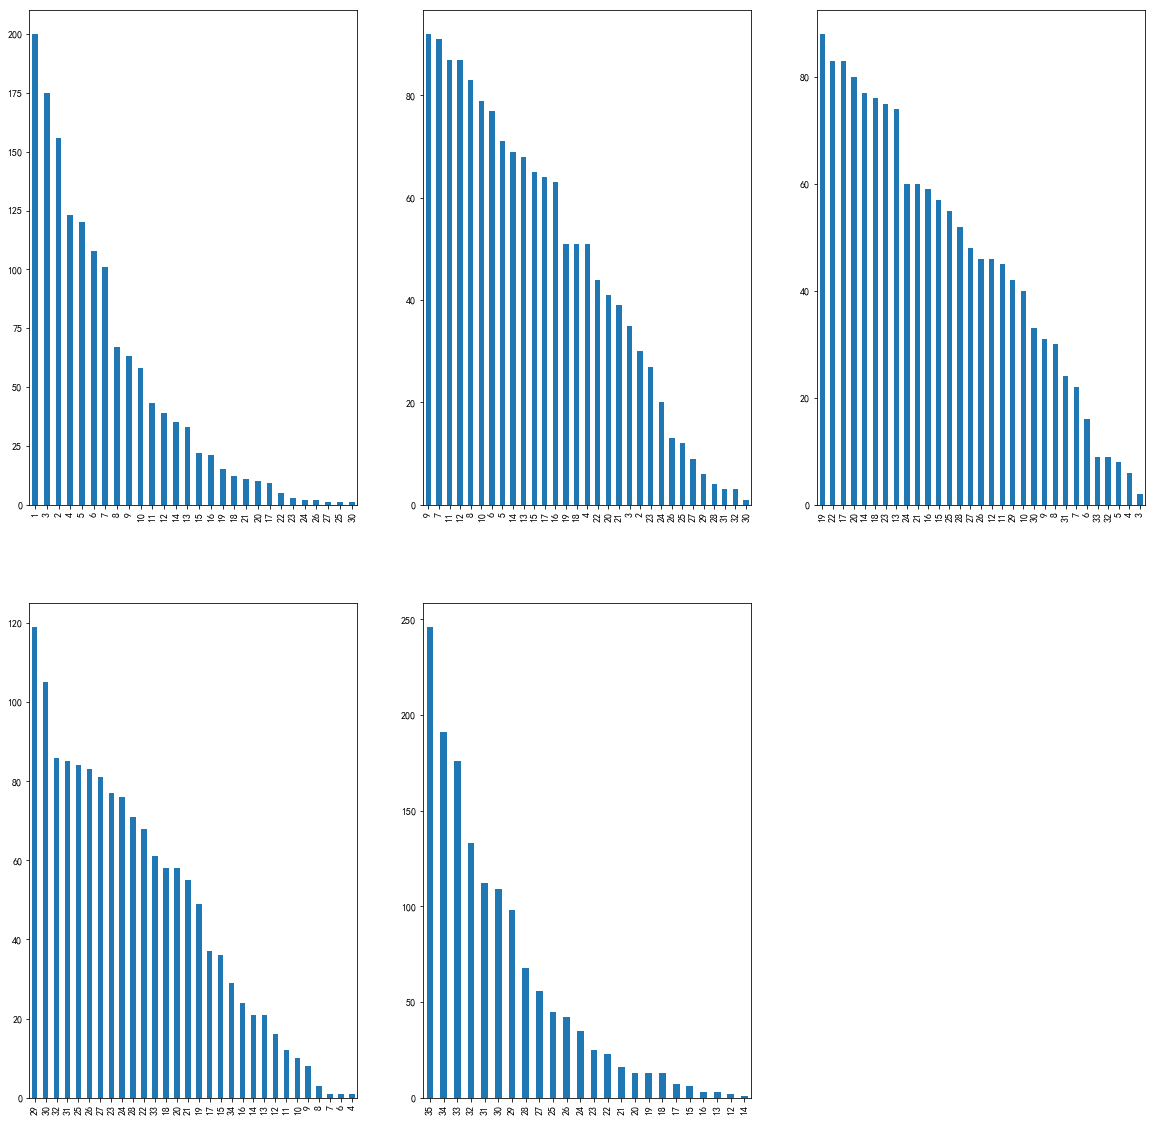

In [5]:
fig=plt.figure()
fig.set(alpha=0.2)
f, ax = plt.subplots(figsize=(20, 20))
plt.subplot2grid((2,3),(0,0))
df_train.NQ1.value_counts().plot(kind='bar')
plt.subplot2grid((2,3),(0,1))
df_train.NQ2.value_counts().plot(kind='bar')
plt.subplot2grid((2,3),(0,2))
df_train.NQ3.value_counts().plot(kind='bar')
plt.subplot2grid((2,3),(1,0))
df_train.NQ4.value_counts().plot(kind='bar')
plt.subplot2grid((2,3),(1,1))
df_train.NQ5.value_counts().plot(kind='bar')
  #ctrl+/注释多行
plt.show()

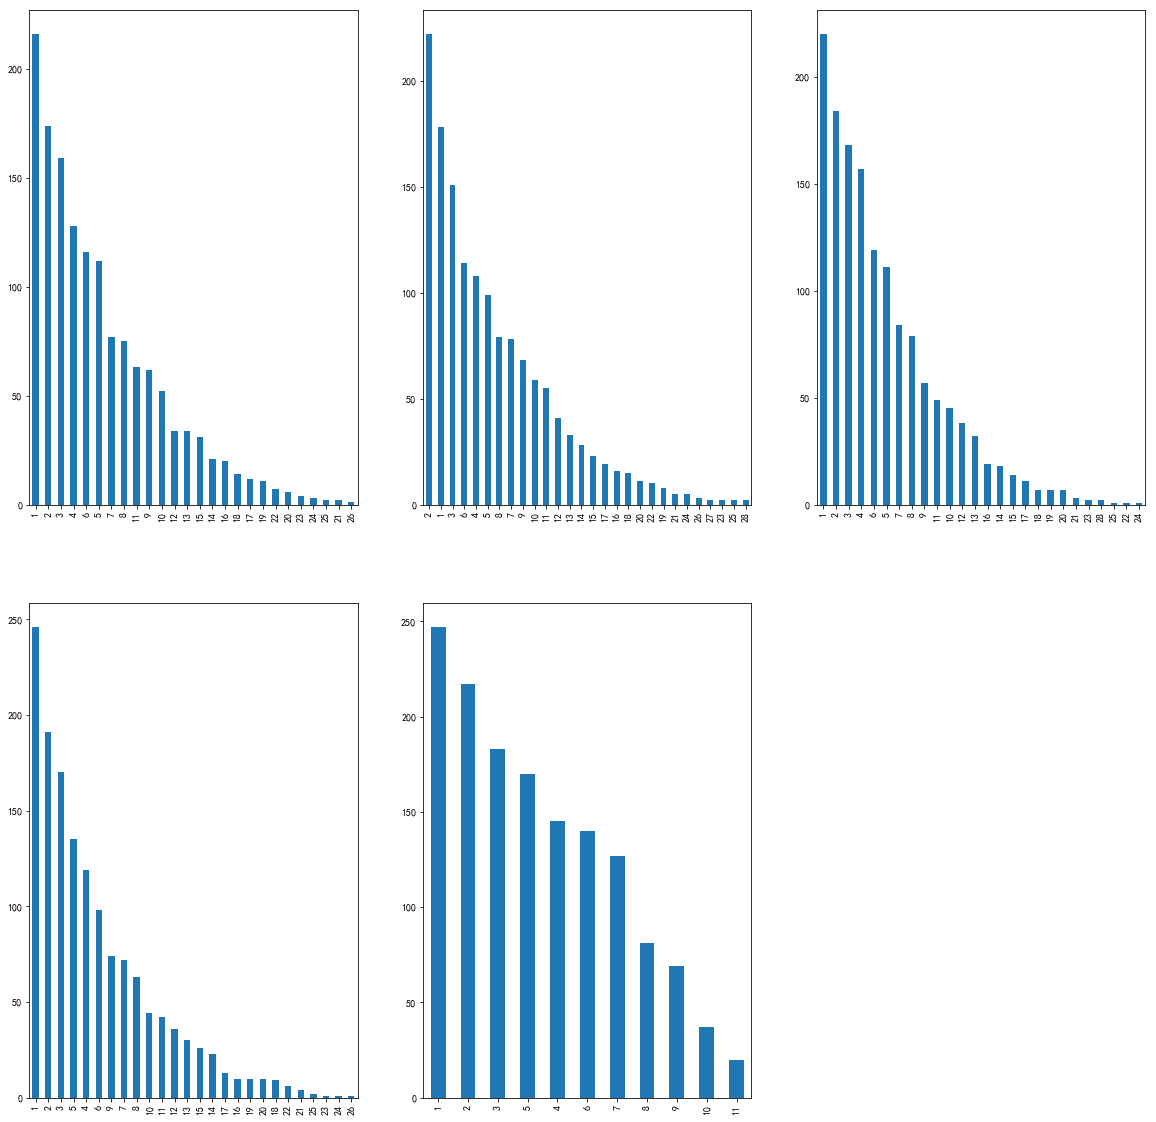

In [6]:
fig=plt.figure()
fig.set(alpha=0.2)
f, ax = plt.subplots(figsize=(20, 20))
plt.subplot2grid((2,3),(0,0))
df_train.minus1.value_counts().plot(kind='bar')
plt.subplot2grid((2,3),(0,1))
df_train.minus2.value_counts().plot(kind='bar')
plt.subplot2grid((2,3),(0,2))
df_train.minus3.value_counts().plot(kind='bar')
plt.subplot2grid((2,3),(1,0))
df_train.minus4.value_counts().plot(kind='bar')
plt.subplot2grid((2,3),(1,1))
df_train.minush.value_counts().plot(kind='bar')
  #ctrl+/注释多行
plt.show()

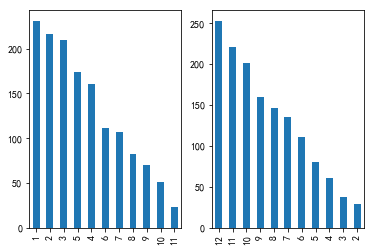

In [7]:
plt.subplot2grid((1,2),(0,0))
df_train.NH1.value_counts().plot(kind='bar')
plt.subplot2grid((1,2),(0,1))
df_train.NH2.value_counts().plot(kind='bar')
plt.show()

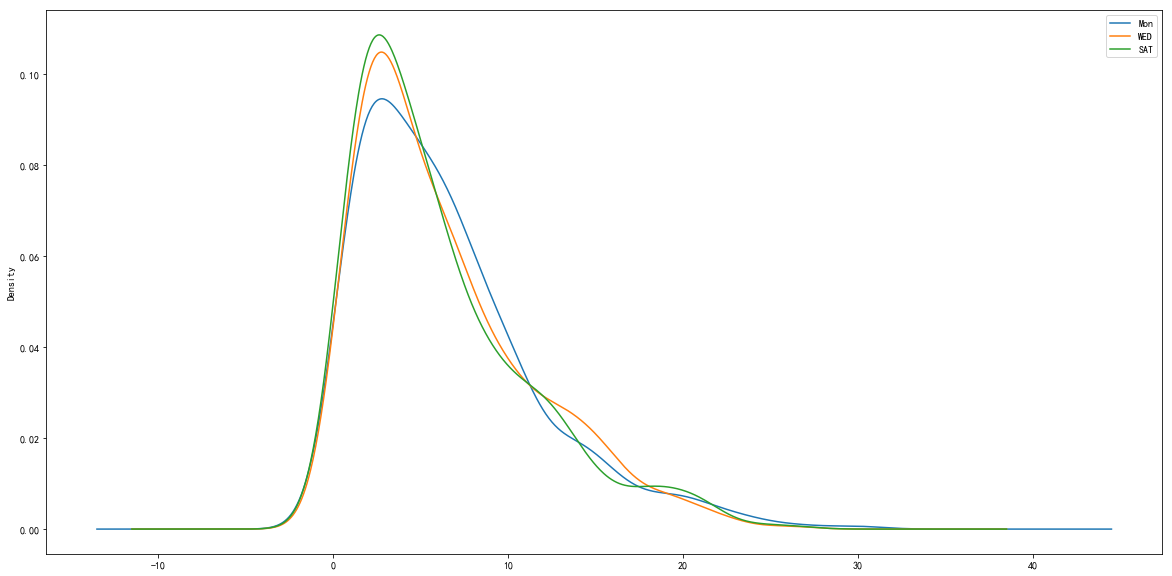

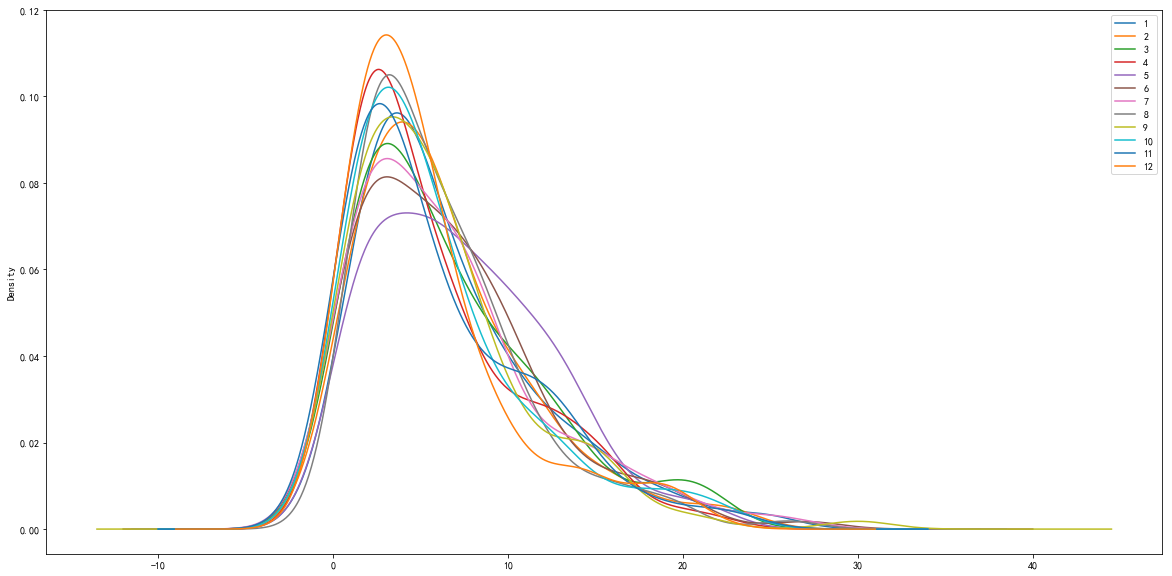

In [8]:
f, ax = plt.subplots(figsize=(20, 10))
df_train.NQ1[df_train.Week=='MON'].plot(kind='kde')
df_train.NQ1[df_train.Week=='WED'].plot(kind='kde')
df_train.NQ1[df_train.Week=='SAT'].plot(kind='kde')
plt.legend(('Mon','WED','SAT'))
plt.show()
f, ax = plt.subplots(figsize=(20, 10))
df_train.NQ1[df_train.MON==1].plot(kind='kde')
df_train.NQ1[df_train.MON==2].plot(kind='kde')
df_train.NQ1[df_train.MON==3].plot(kind='kde')
df_train.NQ1[df_train.MON==4].plot(kind='kde')
df_train.NQ1[df_train.MON==5].plot(kind='kde')
df_train.NQ1[df_train.MON==6].plot(kind='kde')
df_train.NQ1[df_train.MON==7].plot(kind='kde')
df_train.NQ1[df_train.MON==8].plot(kind='kde')
df_train.NQ1[df_train.MON==9].plot(kind='kde')
df_train.NQ1[df_train.MON==10].plot(kind='kde')
df_train.NQ1[df_train.MON==11].plot(kind='kde')
df_train.NQ1[df_train.MON==12].plot(kind='kde')
plt.legend((1,2,3,4,5,6,7,8,9,10,11,12))
plt.show()

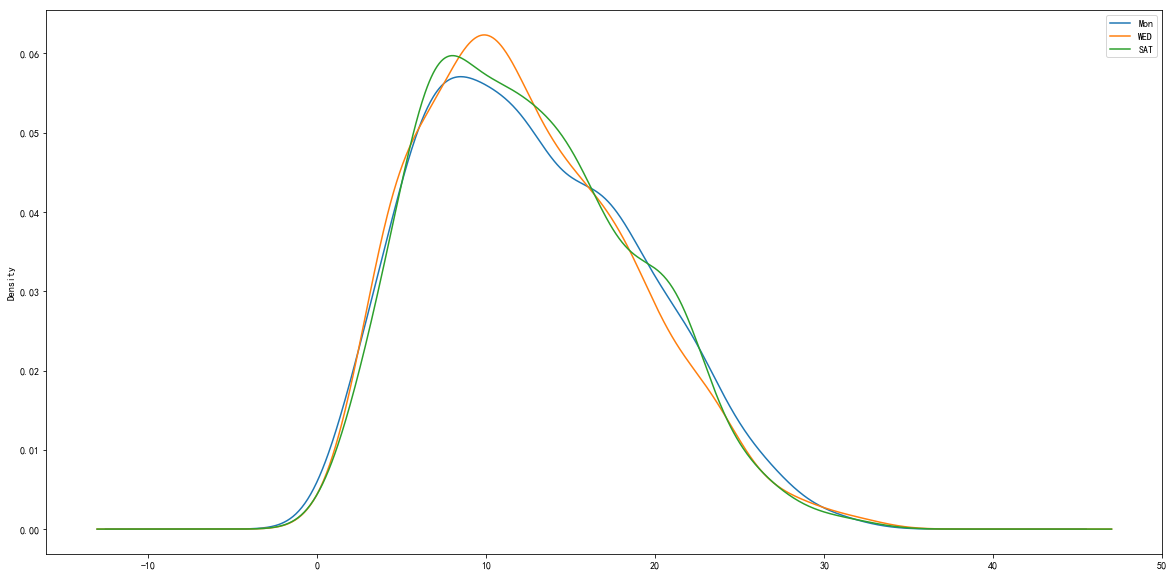

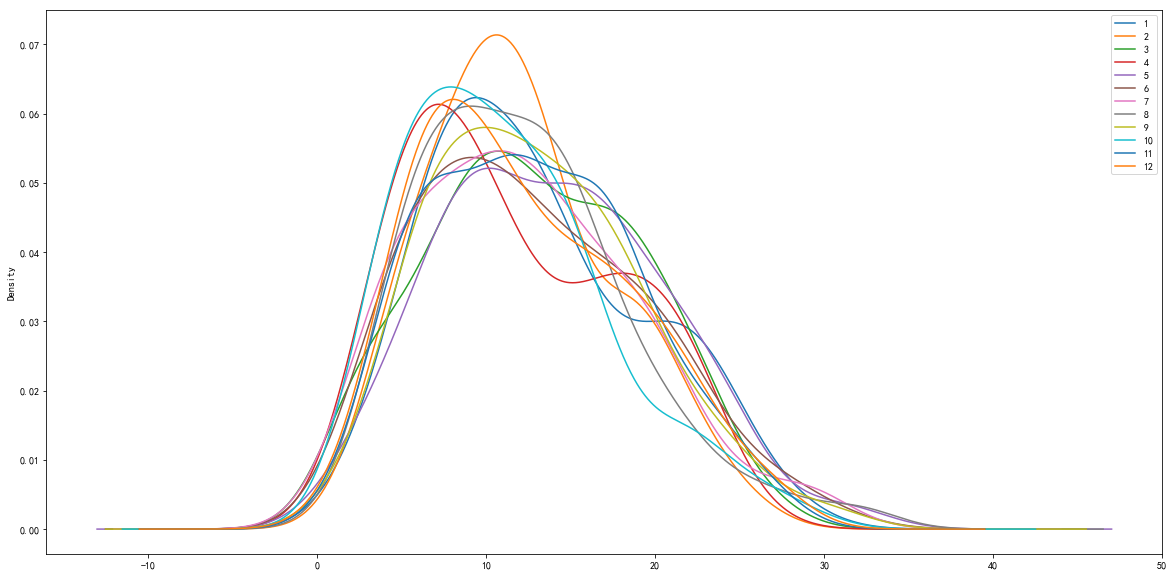

In [9]:
f, ax = plt.subplots(figsize=(20, 10))
df_train.NQ2[df_train.Week=='MON'].plot(kind='kde')
df_train.NQ2[df_train.Week=='WED'].plot(kind='kde')
df_train.NQ2[df_train.Week=='SAT'].plot(kind='kde')
plt.legend(('Mon','WED','SAT'))
plt.show()
f, ax = plt.subplots(figsize=(20, 10))
df_train.NQ2[df_train.MON==1].plot(kind='kde')
df_train.NQ2[df_train.MON==2].plot(kind='kde')
df_train.NQ2[df_train.MON==3].plot(kind='kde')
df_train.NQ2[df_train.MON==4].plot(kind='kde')
df_train.NQ2[df_train.MON==5].plot(kind='kde')
df_train.NQ2[df_train.MON==6].plot(kind='kde')
df_train.NQ2[df_train.MON==7].plot(kind='kde')
df_train.NQ2[df_train.MON==8].plot(kind='kde')
df_train.NQ2[df_train.MON==9].plot(kind='kde')
df_train.NQ2[df_train.MON==10].plot(kind='kde')
df_train.NQ2[df_train.MON==11].plot(kind='kde')
df_train.NQ2[df_train.MON==12].plot(kind='kde')
plt.legend((1,2,3,4,5,6,7,8,9,10,11,12))
plt.show()

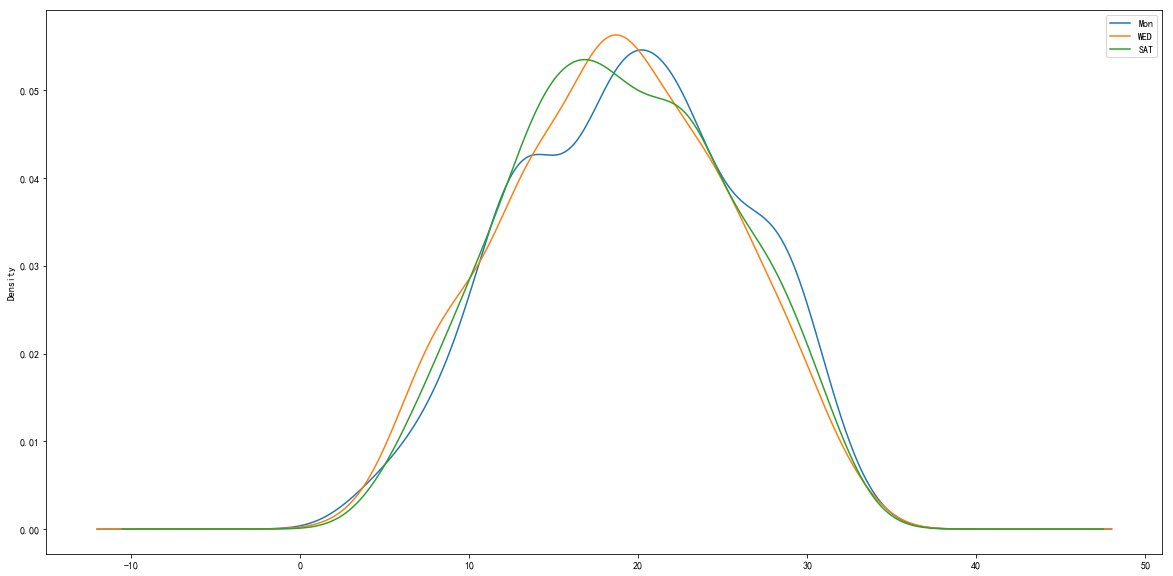

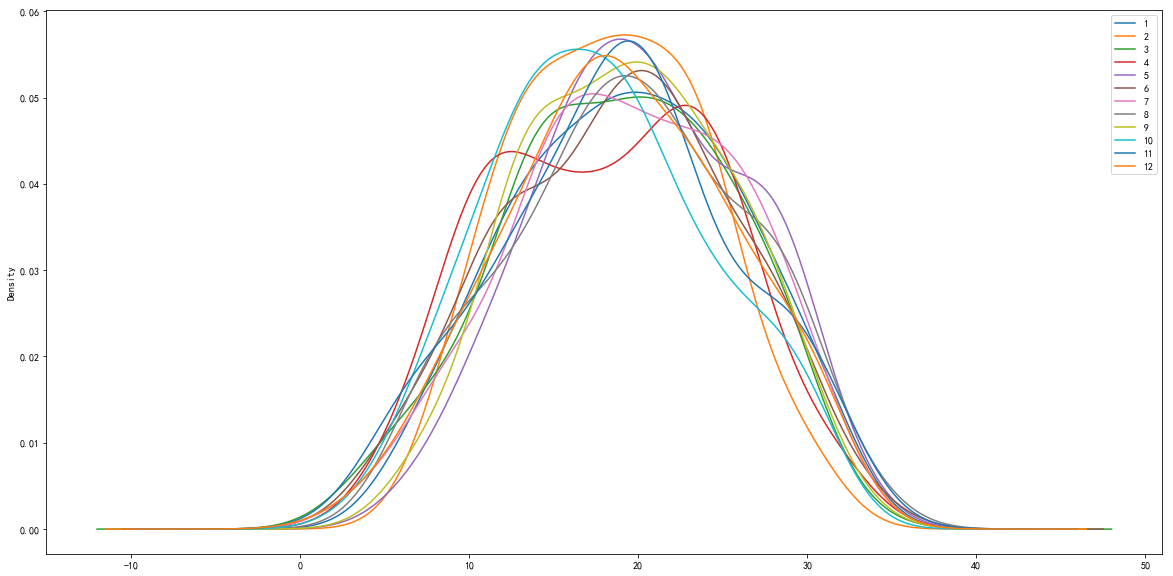

In [10]:
f, ax = plt.subplots(figsize=(20, 10))
df_train.NQ3[df_train.Week=='MON'].plot(kind='kde')
df_train.NQ3[df_train.Week=='WED'].plot(kind='kde')
df_train.NQ3[df_train.Week=='SAT'].plot(kind='kde')
plt.legend(('Mon','WED','SAT'))
plt.show()
f, ax = plt.subplots(figsize=(20, 10))
df_train.NQ3[df_train.MON==1].plot(kind='kde')
df_train.NQ3[df_train.MON==2].plot(kind='kde')
df_train.NQ3[df_train.MON==3].plot(kind='kde')
df_train.NQ3[df_train.MON==4].plot(kind='kde')
df_train.NQ3[df_train.MON==5].plot(kind='kde')
df_train.NQ3[df_train.MON==6].plot(kind='kde')
df_train.NQ3[df_train.MON==7].plot(kind='kde')
df_train.NQ3[df_train.MON==8].plot(kind='kde')
df_train.NQ3[df_train.MON==9].plot(kind='kde')
df_train.NQ3[df_train.MON==10].plot(kind='kde')
df_train.NQ3[df_train.MON==11].plot(kind='kde')
df_train.NQ3[df_train.MON==12].plot(kind='kde')
plt.legend((1,2,3,4,5,6,7,8,9,10,11,12))
plt.show()

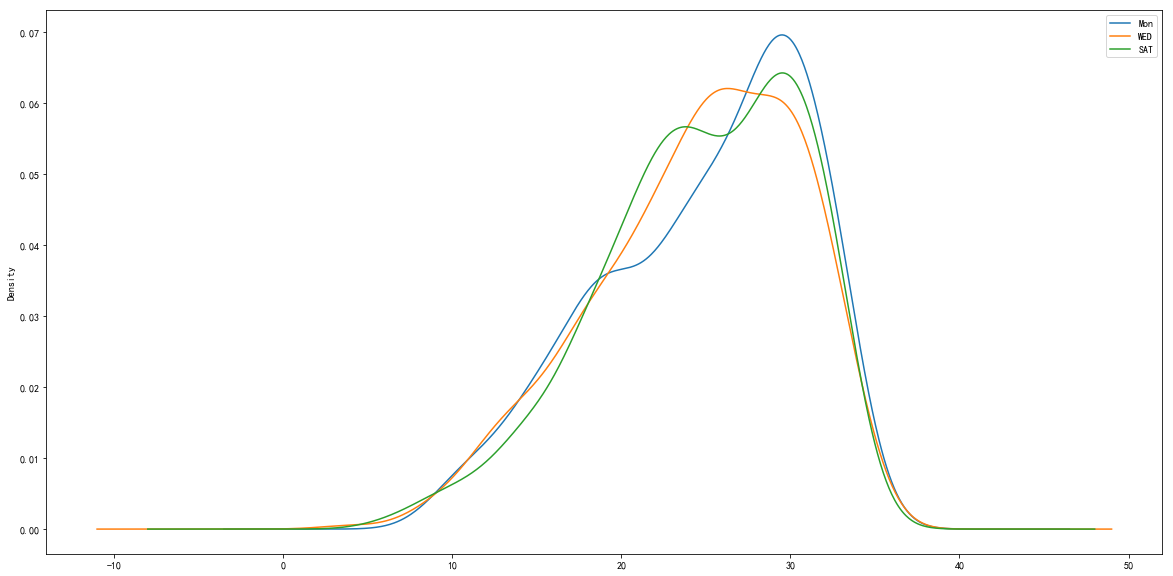

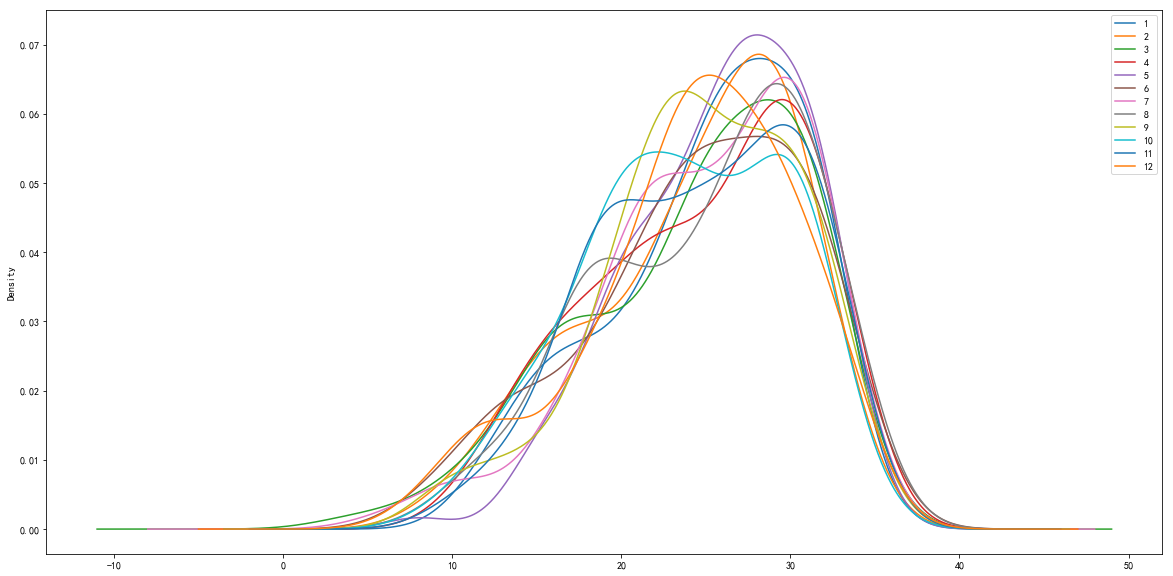

In [11]:
f, ax = plt.subplots(figsize=(20, 10))
df_train.NQ4[df_train.Week=='MON'].plot(kind='kde')
df_train.NQ4[df_train.Week=='WED'].plot(kind='kde')
df_train.NQ4[df_train.Week=='SAT'].plot(kind='kde')
plt.legend(('Mon','WED','SAT'))
plt.show()
f, ax = plt.subplots(figsize=(20, 10))
df_train.NQ4[df_train.MON==1].plot(kind='kde')
df_train.NQ4[df_train.MON==2].plot(kind='kde')
df_train.NQ4[df_train.MON==3].plot(kind='kde')
df_train.NQ4[df_train.MON==4].plot(kind='kde')
df_train.NQ4[df_train.MON==5].plot(kind='kde')
df_train.NQ4[df_train.MON==6].plot(kind='kde')
df_train.NQ4[df_train.MON==7].plot(kind='kde')
df_train.NQ4[df_train.MON==8].plot(kind='kde')
df_train.NQ4[df_train.MON==9].plot(kind='kde')
df_train.NQ4[df_train.MON==10].plot(kind='kde')
df_train.NQ4[df_train.MON==11].plot(kind='kde')
df_train.NQ4[df_train.MON==12].plot(kind='kde')
plt.legend((1,2,3,4,5,6,7,8,9,10,11,12))
plt.show()

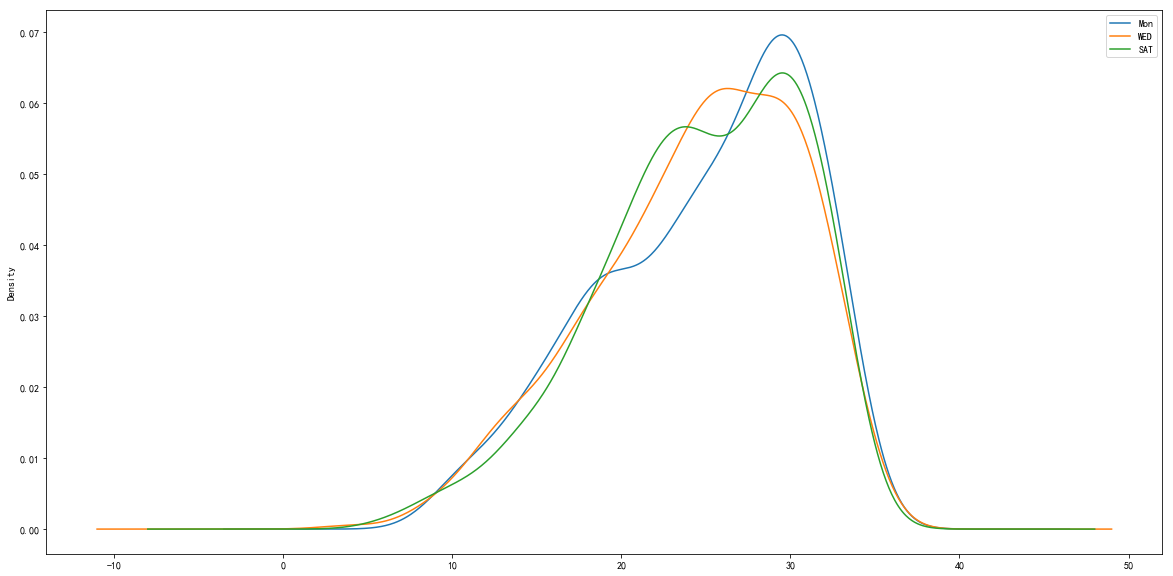

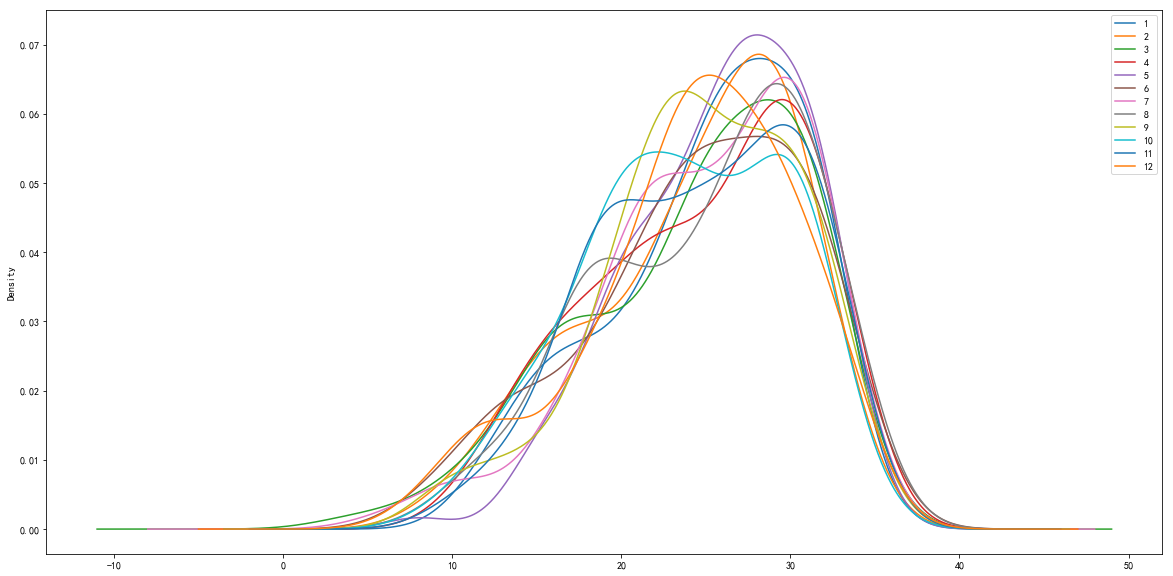

In [12]:
f, ax = plt.subplots(figsize=(20, 10))
df_train.NQ4[df_train.Week=='MON'].plot(kind='kde')
df_train.NQ4[df_train.Week=='WED'].plot(kind='kde')
df_train.NQ4[df_train.Week=='SAT'].plot(kind='kde')
plt.legend(('Mon','WED','SAT'))
plt.show()
f, ax = plt.subplots(figsize=(20, 10))
df_train.NQ4[df_train.MON==1].plot(kind='kde')
df_train.NQ4[df_train.MON==2].plot(kind='kde')
df_train.NQ4[df_train.MON==3].plot(kind='kde')
df_train.NQ4[df_train.MON==4].plot(kind='kde')
df_train.NQ4[df_train.MON==5].plot(kind='kde')
df_train.NQ4[df_train.MON==6].plot(kind='kde')
df_train.NQ4[df_train.MON==7].plot(kind='kde')
df_train.NQ4[df_train.MON==8].plot(kind='kde')
df_train.NQ4[df_train.MON==9].plot(kind='kde')
df_train.NQ4[df_train.MON==10].plot(kind='kde')
df_train.NQ4[df_train.MON==11].plot(kind='kde')
df_train.NQ4[df_train.MON==12].plot(kind='kde')
plt.legend((1,2,3,4,5,6,7,8,9,10,11,12))
plt.show()

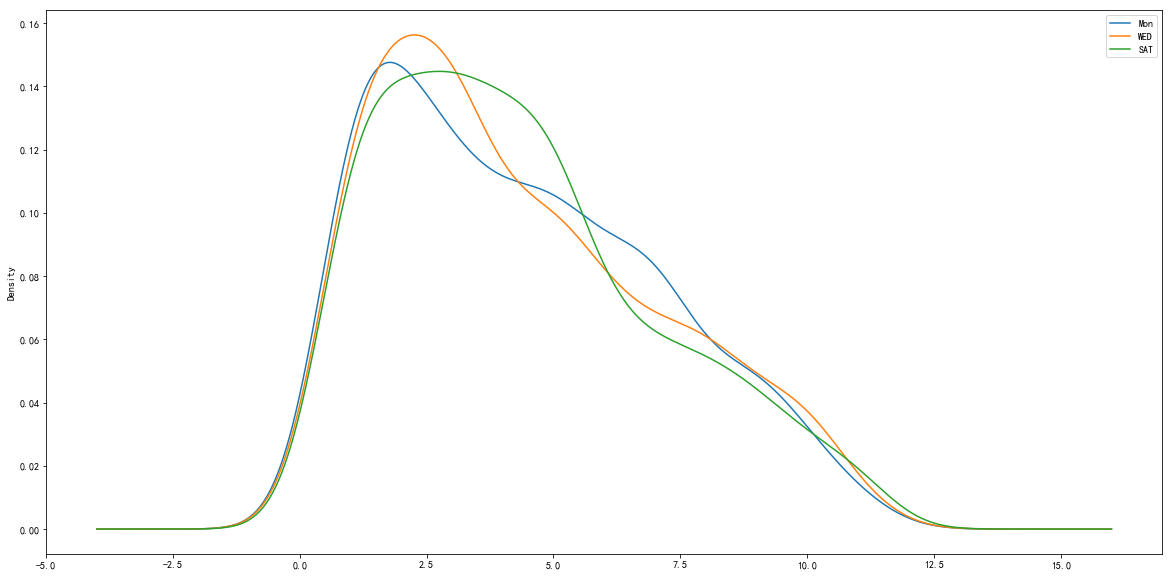

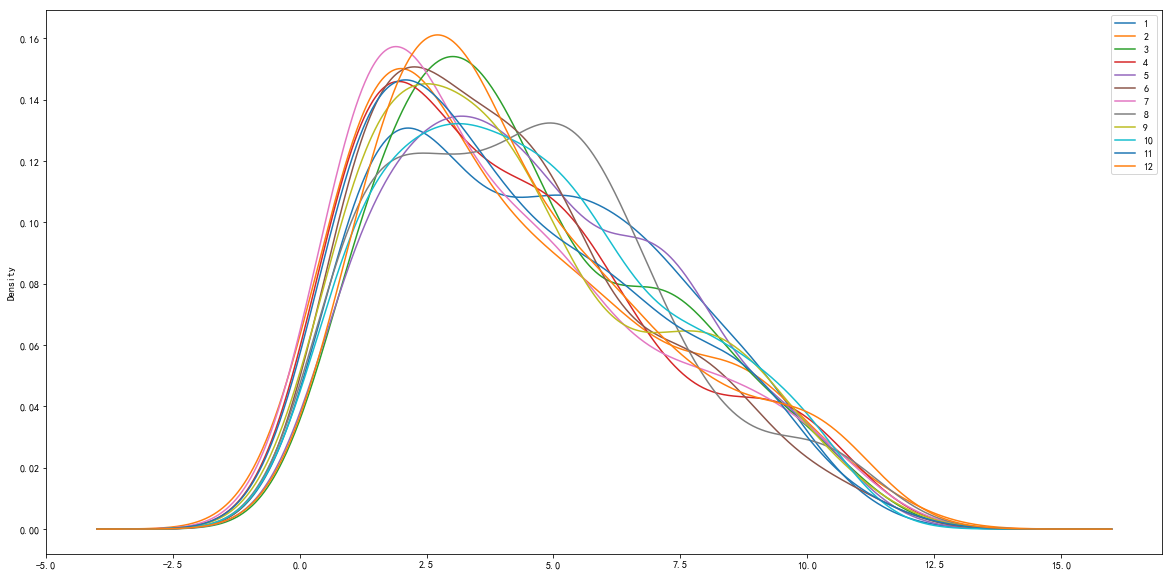

In [13]:
f, ax = plt.subplots(figsize=(20, 10))
df_train.NH1[df_train.Week=='MON'].plot(kind='kde')
df_train.NH1[df_train.Week=='WED'].plot(kind='kde')
df_train.NH1[df_train.Week=='SAT'].plot(kind='kde')
plt.legend(('Mon','WED','SAT'))
plt.show()
f, ax = plt.subplots(figsize=(20, 10))
df_train.NH1[df_train.MON==1].plot(kind='kde')
df_train.NH1[df_train.MON==2].plot(kind='kde')
df_train.NH1[df_train.MON==3].plot(kind='kde')
df_train.NH1[df_train.MON==4].plot(kind='kde')
df_train.NH1[df_train.MON==5].plot(kind='kde')
df_train.NH1[df_train.MON==6].plot(kind='kde')
df_train.NH1[df_train.MON==7].plot(kind='kde')
df_train.NH1[df_train.MON==8].plot(kind='kde')
df_train.NH1[df_train.MON==9].plot(kind='kde')
df_train.NH1[df_train.MON==10].plot(kind='kde')
df_train.NH1[df_train.MON==11].plot(kind='kde')
df_train.NH1[df_train.MON==12].plot(kind='kde')
plt.legend((1,2,3,4,5,6,7,8,9,10,11,12))

plt.show()

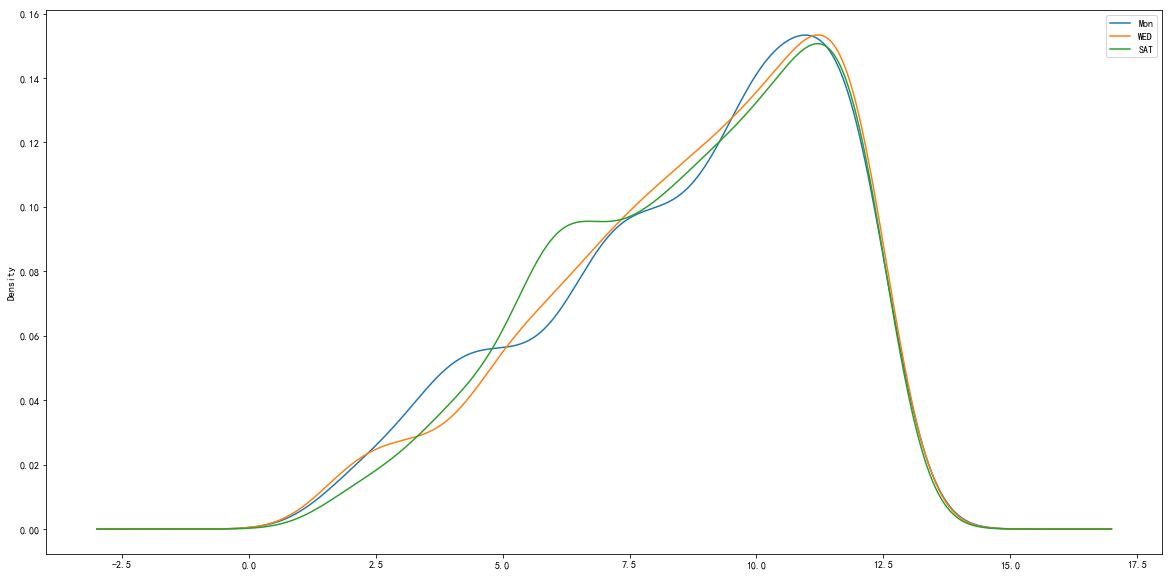

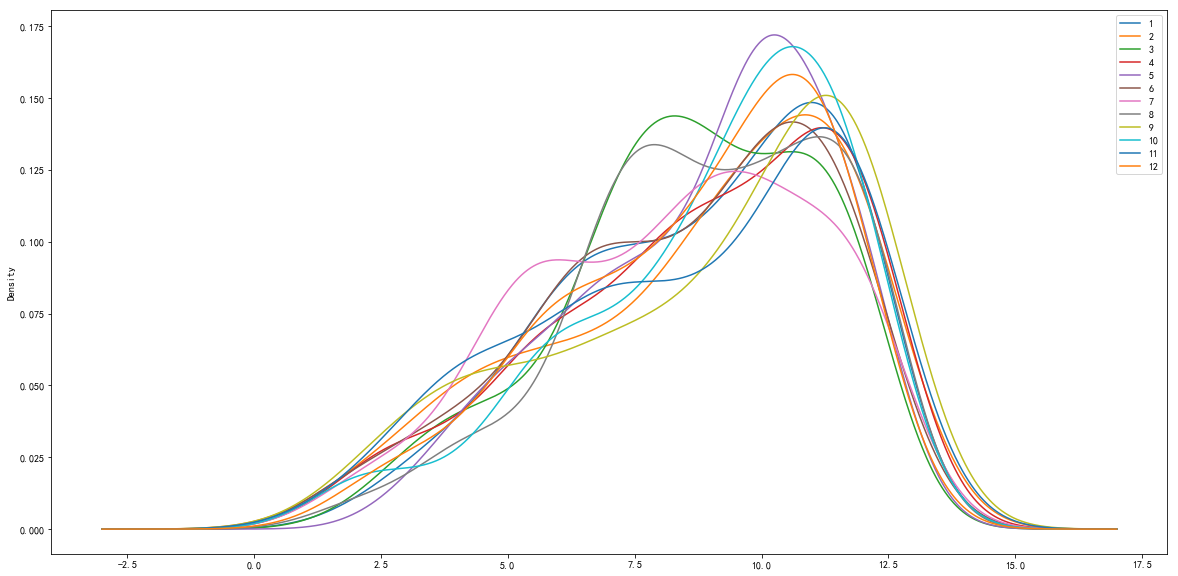

In [14]:
f, ax = plt.subplots(figsize=(20, 10))
df_train.NH2[df_train.Week=='MON'].plot(kind='kde')
df_train.NH2[df_train.Week=='WED'].plot(kind='kde')
df_train.NH2[df_train.Week=='SAT'].plot(kind='kde')
plt.legend(('Mon','WED','SAT'))
plt.show()
f, ax = plt.subplots(figsize=(20, 10))
df_train.NH2[df_train.MON==1].plot(kind='kde')
df_train.NH2[df_train.MON==2].plot(kind='kde')
df_train.NH2[df_train.MON==3].plot(kind='kde')
df_train.NH2[df_train.MON==4].plot(kind='kde')
df_train.NH2[df_train.MON==5].plot(kind='kde')
df_train.NH2[df_train.MON==6].plot(kind='kde')
df_train.NH2[df_train.MON==7].plot(kind='kde')
df_train.NH2[df_train.MON==8].plot(kind='kde')
df_train.NH2[df_train.MON==9].plot(kind='kde')
df_train.NH2[df_train.MON==10].plot(kind='kde')
df_train.NH2[df_train.MON==11].plot(kind='kde')
df_train.NH2[df_train.MON==12].plot(kind='kde')
plt.legend((1,2,3,4,5,6,7,8,9,10,11,12))
plt.show()

In [15]:
dummies_Week=pd.get_dummies(df_train['Week'],prefix='Week')
dummies_MON=pd.get_dummies(df_train['MON'],prefix='MON')
dummies_Date=pd.get_dummies(df_train['Date'],prefix='Date')

In [16]:
df_train=pd.concat([df_train,dummies_Week,
                            dummies_MON,dummies_Date
 ],axis=1)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 61 columns):
NQ1         1436 non-null int64
NQ2         1436 non-null int64
NQ3         1436 non-null int64
NQ4         1436 non-null int64
NQ5         1436 non-null int64
NH1         1436 non-null int64
NH2         1436 non-null int64
MON         1436 non-null int64
minus1      1436 non-null int64
minus2      1436 non-null int64
minus3      1436 non-null int64
minus4      1436 non-null int64
minush      1436 non-null int64
Date        1436 non-null int64
Week        1436 non-null object
Week_MON    1436 non-null uint8
Week_SAT    1436 non-null uint8
Week_WED    1436 non-null uint8
MON_1       1436 non-null uint8
MON_2       1436 non-null uint8
MON_3       1436 non-null uint8
MON_4       1436 non-null uint8
MON_5       1436 non-null uint8
MON_6       1436 non-null uint8
MON_7       1436 non-null uint8
MON_8       1436 non-null uint8
MON_9       1436 non-null uint8
MON_10      1436 non-null ui

In [18]:
A=df_train.drop(['Week','MON','Date','NQ1','NQ2','NQ3','NQ4','NQ5','NH1','NH2'],axis=1)
B=df_train[['NQ1','NQ2','NQ3','NQ4','NQ5','NH1','NH2']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(A)
scaler2 = StandardScaler().fit(B)

In [19]:
B


,NQ1,NQ2,NQ3,NQ4,NQ5,NH1,NH2
0,2,18,23,27,30,5,10
1,1,11,19,26,35,11,12
2,4,10,15,20,24,7,11
3,11,15,16,20,29,4,8
4,4,15,16,20,35,3,12
5,10,16,22,26,27,7,11
6,6,10,16,29,33,5,11
7,3,4,10,16,32,4,9
8,2,8,14,15,35,10,12
9,1,4,16,19,33,3,12


In [20]:
print(scaler.mean_,scaler.var_)

print(scaler2.mean_,scaler2.var_)

[ 6.17618384  6.46169916  5.69011142  5.75139276  4.35097493  0.33356546
  0.33356546  0.33286908  0.08844011  0.06754875  0.09192201  0.08983287
  0.08704735  0.08077994  0.08286908  0.08356546  0.08008357  0.08426184
  0.08008357  0.08356546  0.03133705  0.03412256  0.03203343  0.03412256
  0.03133705  0.03412256  0.03272981  0.03203343  0.03342618  0.03203343
  0.03412256  0.03272981  0.03272981  0.03342618  0.03133705  0.03481894
  0.03133705  0.03342618  0.03203343  0.03412256  0.03203343  0.03203343
  0.03342618  0.03272981  0.03342618  0.03272981  0.03412256  0.03203343
  0.02994429  0.03133705  0.01880223] [  2.38693771e+01   2.70758311e+01   1.99116292e+01   2.23093644e+01
   7.17486674e+00   2.22299544e-01   2.22299544e-01   2.22067256e-01
   8.06184581e-02   6.29859134e-02   8.34723505e-02   8.17629247e-02
   7.94701120e-02   7.42545449e-02   7.60017962e-02   7.65822736e-02
   7.36701880e-02   7.71617810e-02   7.36701880e-02   7.65822736e-02
   3.03550368e-02   3.29582134e-0

In [21]:
AA=scaler.transform(A)
BB=scaler2.transform(B)

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
X=AA
y=BB
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=13)

the r2_score is 0.00638167791292 	mean_absolute_error is 0.804495713721 	 the mean_squared_error is 1.00469385476


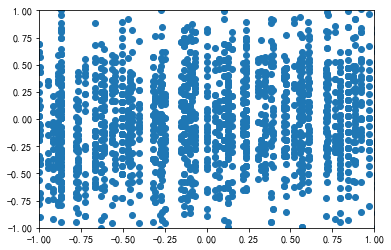

0.31683865714


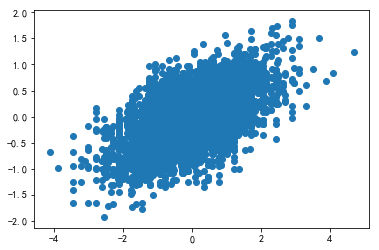

In [23]:
clf_KNN=KNeighborsRegressor()
clf_KNN.fit(X_train,y_train)
predicts_knn=clf_KNN.predict(X_test)
predicts_knnn=clf_KNN.predict(X_train)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
cross_val_score(clf_KNN,X,y,cv=5,scoring='r2')
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_knn),mean_absolute_error(y_test,predicts_knn),mean_squared_error(y_test,predicts_knn)))
plt.scatter(y_test,predicts_knn)
axis([-1,1,-1,1])
plt.show()
print(r2_score(y_train,predicts_knnn))

plt.scatter(y_train,predicts_knnn)
plt.show()


the r2_score is 0.440261174021 	mean_absolute_error is 0.581962442615 	 the mean_squared_error is 0.566775285211


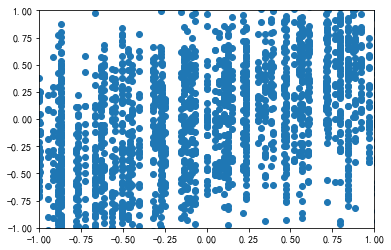

0.481927025008


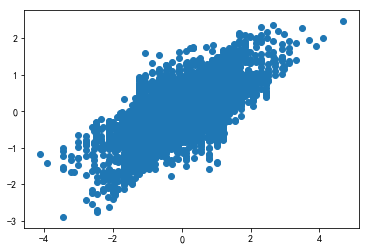

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
cross_val_score(lr,X,y,cv=5)
lr.fit(X_train,y_train)
predicts_lr=lr.predict(X_test)
predicts_lrr=lr.predict(X_train)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_lr),mean_absolute_error(y_test,predicts_lr),mean_squared_error(y_test,predicts_lr)))
plt.scatter(y_test,predicts_lr)

axis([-1,1,-1,1])
plt.show()
print(r2_score(y_train,predicts_lrr))
plt.scatter(y_train,predicts_lrr)
plt.show()


In [25]:

origin_predicts_lr = scaler2.inverse_transform(predicts_lr) 


In [26]:
origin_predicts_lr

array([[  6.4533064 ,   8.48291944,  12.37186487, ...,  30.46018472,
          4.20716817,  10.12607599],
       [  8.50172444,  21.67194793,  22.7075079 , ...,  28.53881704,
          1.61122078,  11.54620339],
       [  6.17330681,  17.87035065,  18.74328253, ...,  27.71350228,
          3.07740127,   9.01734525],
       ..., 
       [  1.59506791,  25.32879502,  29.62340953, ...,  32.79202642,
          5.78063016,   6.80186717],
       [  7.3227788 ,  13.30386285,  15.27577936, ...,  30.32918238,
          4.92767602,   8.99949448],
       [  8.89593439,  11.85636088,  13.79914521, ...,  28.74514572,
          2.29398143,   9.27254505]])

In [27]:
origin_predicts_lr_test = scaler2.inverse_transform(y_test) 
origin_predicts_lr_test

array([[  4.,   6.,  10., ...,  28.,   2.,   8.],
       [  6.,  19.,  20., ...,  26.,   1.,  11.],
       [ 10.,  22.,  23., ...,  32.,   1.,   7.],
       ..., 
       [  2.,  26.,  30., ...,  33.,  11.,  12.],
       [ 11.,  17.,  19., ...,  34.,   6.,  10.],
       [  9.,  12.,  14., ...,  29.,   3.,  10.]])

[ 0.36042016  0.40229182  0.35397783  0.38689968  0.31297043]
the r2_score is 0.375103505162 	mean_absolute_error is 0.616746100295 	 the mean_squared_error is 0.633096221674


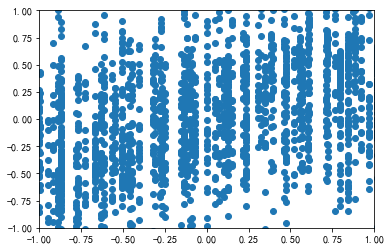

0.915748985072


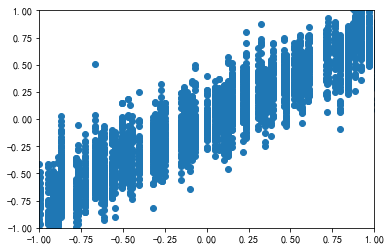

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
rfr=RandomForestRegressor(n_estimators=1500)
print(cross_val_score(rfr,X,y,cv=5))
rfr.fit(X_train,y_train)
predicts_rfr=rfr.predict(X_test)
predicts_rfrr=rfr.predict(X_train)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_rfr),mean_absolute_error(y_test,predicts_rfr),mean_squared_error(y_test,predicts_rfr)))
plt.scatter(y_test,predicts_rfr)
axis([-1,1,-1,1])
plt.show()
print(r2_score(y_train,predicts_rfrr))
plt.scatter(y_train,predicts_rfrr)
axis([-1,1,-1,1])
plt.show()

array([[ 2.01075744, -0.28090994, -0.37875811, ..., -0.1756947 ,
        -0.17986336, -0.13842878],
       [ 0.78266599,  0.29563128,  0.29354924, ..., -0.1756947 ,
        -0.17986336, -0.13842878],
       [-0.03606165, -0.28090994, -0.15465566, ..., -0.1756947 ,
        -0.17986336, -0.13842878],
       ..., 
       [ 0.57798408,  0.48781168, -0.37875811, ..., -0.1756947 ,
        -0.17986336, -0.13842878],
       [ 2.62480316, -0.85745115, -1.05106545, ..., -0.1756947 ,
        -0.17986336, -0.13842878],
       [-0.44542546, -1.04963155, -0.15465566, ..., -0.1756947 ,
        -0.17986336, -0.13842878]])

array([[ -8.67606426e-01,   8.74794645e-01,   6.13075793e-01, ...,
         -9.92035537e-02,   2.33367125e-01,   4.73419750e-01],
       [ -1.06640694e+00,  -2.46817061e-01,  -3.20367075e-04, ...,
          1.01897779e+00,   2.44534858e+00,   1.21196485e+00],
       [ -4.70005396e-01,  -4.07047304e-01,  -6.13716527e-01, ...,
         -1.44102116e+00,   9.70694278e-01,   8.42692298e-01],
       ..., 
       [ -2.71204881e-01,   2.33873671e-01,   6.13075793e-01, ...,
         -9.92035537e-02,  -8.72623605e-01,  -2.65125346e-01],
       [ -4.70005396e-01,   1.67594586e+00,   9.19773873e-01, ...,
         -9.92035537e-02,   9.70694278e-01,   4.73419750e-01],
       [ -8.67606426e-01,  -1.04796828e+00,  -1.84050885e+00, ...,
         -7.70112359e-01,  -8.72623605e-01,  -2.65125346e-01]])